In [2]:
#Llamar al dataloader
%run DataLoader.ipynb

## Análisis de tweets repetidos

In [15]:
#Verificamos que el dataset no tenga ningúna fila que contenga la cadena de texto 'NaN'
#ya que vamos a tener que reemplazar los valores nulos por ese string para que el análisis sea bueno
len(dataset[(dataset.keyword.str.contains('NaN')) |\
        (dataset.location.str.contains('NaN')) |\
        (dataset.text.str.contains('NaN'))])

#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

In [16]:
#Encontramos los tweets repetidos
grupo = grupo.groupby(['keyword', 'location', 'text', 'longitud', 'target']).agg({'text':'count'})
grupo.columns = ['repeticiones']
grupo = grupo.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera 
grupo = grupo.pivot_table(index = ['keyword', 'location', 'text', 'longitud'],\
     columns = 'target', values = 'repeticiones', fill_value = 0)
grupo.columns = ['Falso', 'Verdadero']
grupo = grupo.reset_index()
grupo['Total'] = grupo.Falso + grupo.Verdadero
grupo = grupo[grupo.Total > 1]
grupo

,keyword,location,text,longitud,Falso,Verdadero,Total
75,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,114,2,0,2
157,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,138,2,0,2
159,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,138,2,0,2
179,airplane%20accident,NaN,Experts in France begin examining airplane deb...,136,0,2,2
653,bioterrorism,NaN,To fight bioterrorism sir.,26,2,2,4
2373,demolition,NaN,General News Û¢åÊ'Demolition of houses on wat...,137,2,0,2
2470,derailment,India,Madhya Pradesh Train Derailment: Village Youth...,63,0,2,2
2488,derailment,NaN,Madhya Pradesh Train Derailment: Village Youth...,63,0,2,2
2489,derailment,NaN,Madhya Pradesh Train Derailment: Village Youth...,136,0,3,3
2674,detonate,"Morioh, Japan",@TinyJecht Are you another Stand-user? If you ...,99,3,0,3


In [241]:
#Estadísticas sobre repeticiones
grupo.Total.describe()

count    36.000000
mean      2.694444
std       1.141914
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: Total, dtype: float64

In [242]:
#Repeticiones totales
grupo.Total.sum()

97

In [233]:
#Cantidad de veces que se reptite cada texto
grupo.text.value_counts().to_frame()

,text
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,2
Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wednesday began examining t...,1
To fight bioterrorism sir.,1
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife,1
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
incident with injury:I-495 inner loop Exit 31 - MD 97/Georgia Ave Silver Spring,1
Caution: breathing may be hazardous to your health.,1
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/THyzOMVWU0 | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/83jOO0xk29,1
Beware of your temper and a loose tongue! These two dangerous weapons combined can lead a person to the Hellfire #islam!,1


In [234]:
#Cantidad de textos distintos
grupo.text.value_counts().count()

35

In [235]:
grupo.keyword.value_counts().to_frame()

,keyword
hellfire,4
displaced,3
derailment,3
injury,2
detonate,2
aftershock,2
mass%20murder,1
sinking,1
terrorist,1
refugees,1


In [236]:
grupo.keyword.value_counts().count()

26

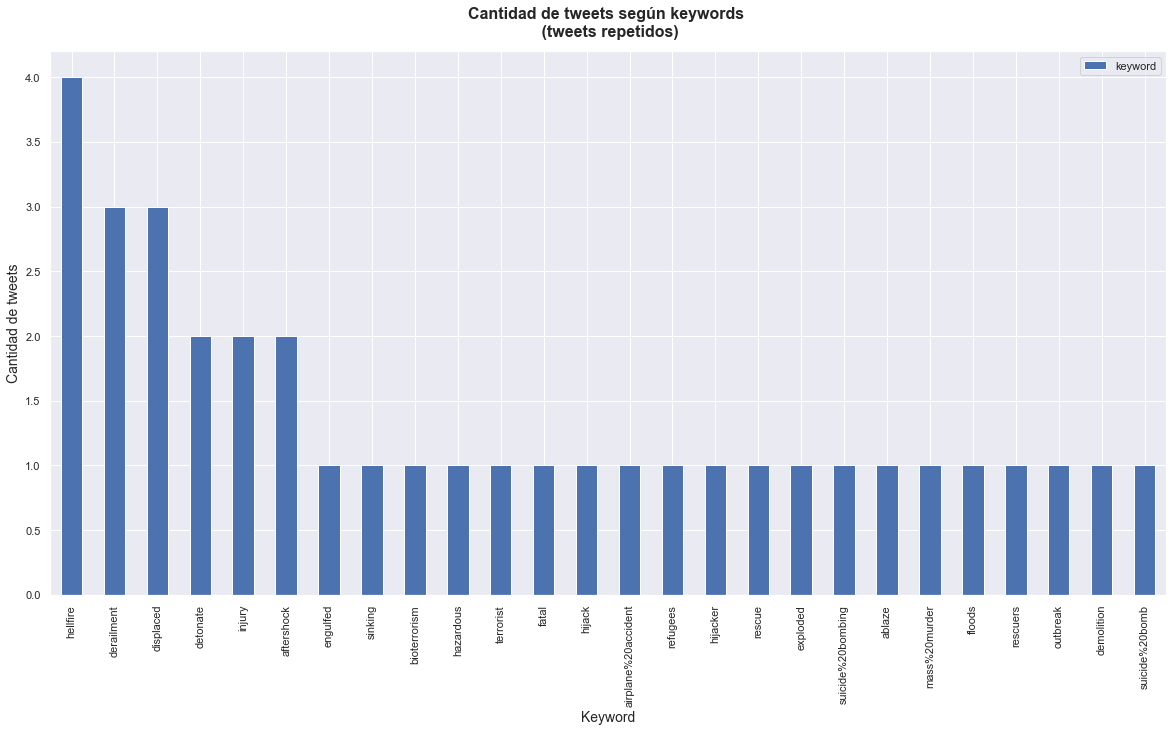

In [17]:

sns.set()
fig, ax = plt.subplots()
grupo.keyword.value_counts().to_frame().plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Keyword",fontsize=14)
ax.set_title('Cantidad de tweets según keywords \n (tweets repetidos)',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()
# fig.savefig('figure.png')

## Análisis de tweets repetidos por location y target

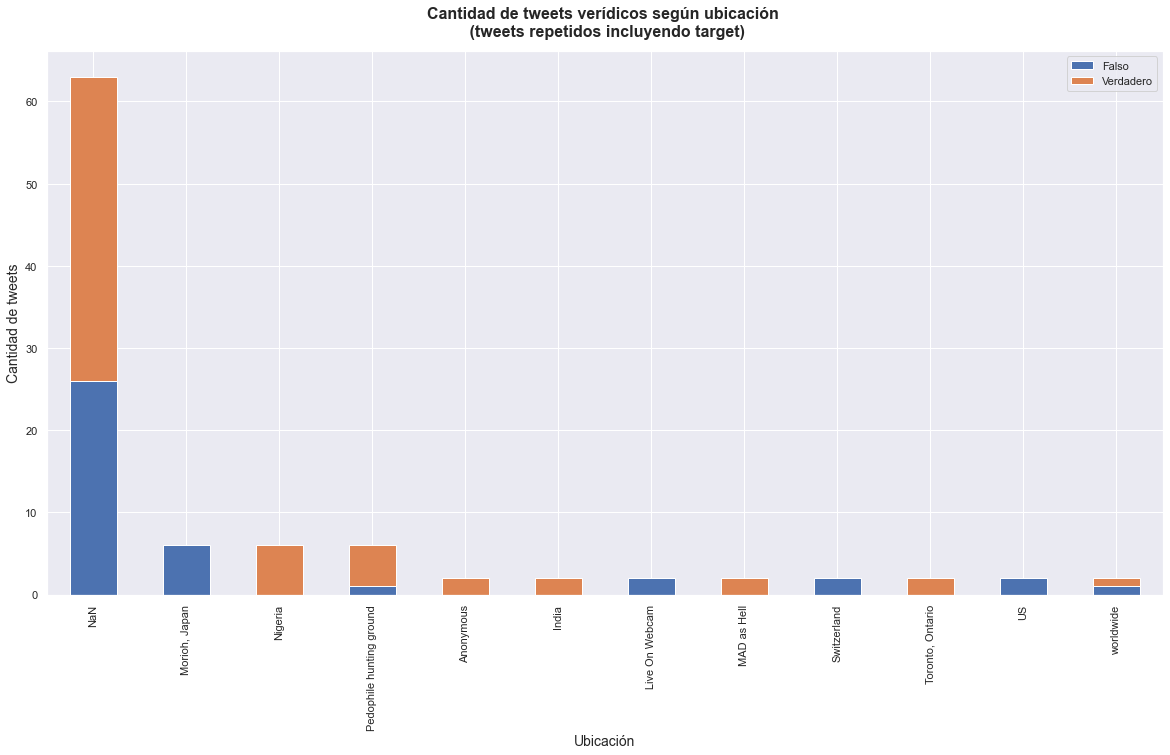

In [244]:
grupo1 = grupo.groupby('location').agg({'Falso': 'sum', 'Verdadero':'sum', 'Total' : 'sum'})
grupo1.columns = ['Falso', 'Verdadero', 'Total']
grupo1 = grupo1.sort_values(by = 'Total', ascending=False)
grupo1 = grupo1.drop(columns = ['Total'])


sns.set()
fig, ax = plt.subplots()
grupo1.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Ubicación",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación \n (tweets repetidos)',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()